#US Accidents Exploratory Data Analysis

So this is a countrywide car accident dataset, which covers 49 states of the USA. Covering from February 2016 to Dec 2021. There are about 2.8 million accident records in this dataset. 

##Preparing the Notebook 

In [ ]:
# loading the Data from Kaggle(you can just ignore this section) 
!pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle_api_token/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download sobhanmoosavi/us-accidents
!unzip us-accidents.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


In [ ]:
# Importing some important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
sns.set_style("darkgrid")

In [ ]:
# Importing and reading the data
df = pd.read_csv('/content/US_Accidents_Dec21_updated.csv')

## Data Preparation and Cleaning

In [ ]:
df.shape

(2845342, 47)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
# counting the number of numeric columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
# counting the percentage of missing values in each columns
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentage[missing_percentage!=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

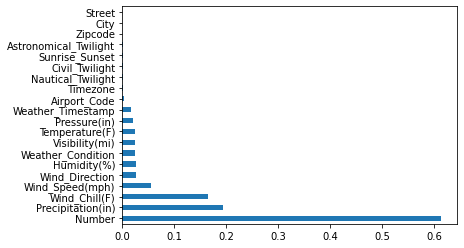

In [ ]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

In [ ]:
# removing columns we're with high percentage of nulls
del_col=['Number', 'Precipitation(in)']
df.drop(del_col, axis=1, inplace=True)

## Exploratory Analysis and Visualization

### **City**
what are the top 10 cities in terms of number of accidents?

In [ ]:
cities = df.City.unique()
len(cities)
# so there are 11682 different city in the dataset
cities_by_accident = df.City.value_counts()
cities_by_accident
# New york data is not available in this dataset

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

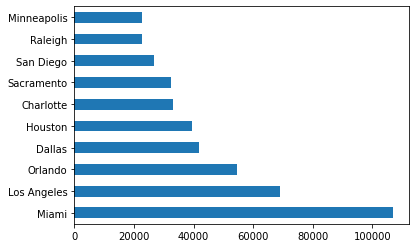

In [ ]:
cities_by_accident[:10].plot(kind= 'barh')

Text(0.5, 1.0, 'number of cities vs number of accidents')

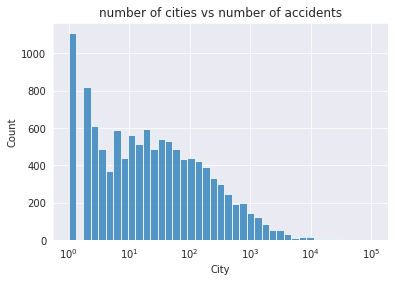

In [ ]:
sns.histplot(cities_by_accident, log_scale=True).set_title("number of cities vs number of accidents")

In [ ]:
cities_with_most_accident = len(cities_by_accident[cities_by_accident>=1000])
cities_with_fewer_accident = len(cities_by_accident[cities_by_accident<1000])
safe_cities_pct = cities_with_fewer_accident/len(cities)
unsafe_cities_pct = cities_with_most_accident/len(cities)
print('so {safe_cities_pct} of the cities have less than 1000 a year \n and \
{unsafe_cities_pct} of the cities have at least 1000 a year'\
 .format(safe_cities_pct=round(safe_cities_pct, 3), unsafe_cities_pct=round(unsafe_cities_pct, 3)))

so 0.957 of the cities have less than 1000 a year 
 and 0.042 of the cities have at least 1000 a year


In [ ]:
super_safe_cities_pct=len(cities_by_accident[cities_by_accident == 1])/len(cities)
print("so there is only {safec_pct} of the cities with only 1 accident".format(safec_pct=round(super_safe_cities_pct, 4)))

so there is only 0.095 of the cities with only 1 accident


### Start Time
some intersting stuff is coming!

In [ ]:
df.Start_Time.head()
# so as we can see here the start time col is a string and not a datetime object

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:51:45
4    2016-02-08 07:53:43
Name: Start_Time, dtype: object

In [ ]:
# converting the Start_Time to a datetime object
df.Start_Time = pd.to_datetime(df.Start_Time)

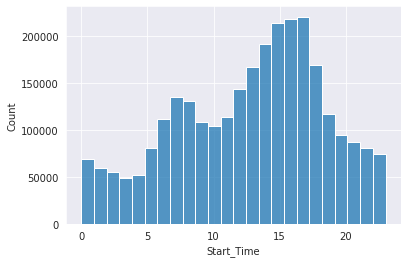

In [ ]:
# what time of the day accidents happen the most
hour = (df.Start_Time.dt.hour)
sns.histplot(hour, bins=24)

- so it seems like there are 2 peeks for the accidents 7 to 9 in the morning and from 14 to 18 in the evening 
probably people going to work and coming back from work which is expected


> Now let's see if it's different on a work day and week ends



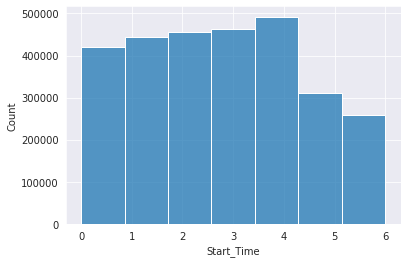

In [ ]:
# what day of the week accidents happen the most
# 0 is Monday and 6 is Sunday
week = (df.Start_Time.dt.dayofweek)
sns.histplot(week, bins=7)

- so as we can see here a trend that keeps gradually increasing on work days until Friday and then starts to go down on weekends 5, 6 which are Saturday and Sunday. 

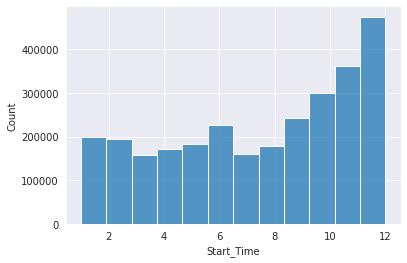

In [ ]:
# what month of the year accidents happen the most in
month = (df.Start_Time.dt.month)
sns.histplot(month, bins=12)

- so it shows here that there is pattern where the car accidents dramatically increase on Nov and Dec for some reason

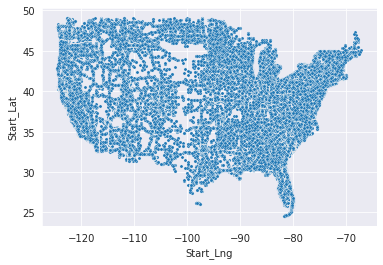

In [ ]:
# plotting the cordinates of the accidents
sns.scatterplot(x= df.Start_Lng, y=df.Start_Lat , s=10)
# let's get into details more!

In [ ]:
lat_long_combine= list(zip(list(df.Start_Lat), list(df.Start_Lng)))

## Asking questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if 3. this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest

## Summary and Conclusion

- New york data is not available
- city that had most accidents was Maiami
- The number of accident in cities decreases exponentially
- 96% of the cities have less than 1000 a year
- 4.2% of the cities have at least 1000 a year
- 9.5% of the cities with only 1 accident
- during the day there are 2 peeks for the accidents 
  - 7 to 9 in the morning
  - 14 to 18 in the evening

  (which is probably just people going to work and coming back from work)
- accidents per week day keep on increasing through the working days from Monday until Friday(at the peak) and
  then decreases gradulally again on Saturday and Sunday
- car accidents dramatically increase on Nov and Dec (Pobably it's because of the Snow)